# **Exploratory Data Analysis (EDA)**

Los datos utilizados para el desarrollo de la aplicación no son públicos. Para obtener acceso a los datos, es necesario solicitarlos a [mcvl.dgoss-sscc@seg-social.es](mailto:mcvl.dgoss-sscc@seg-social.es). Puedes seguir los pasos detallados en [este enlace](https://www.seg-social.es/wps/portal/wss/internet/EstadisticasPresupuestosEstudios/Estadisticas/EST211) para solicitar el acceso. Una vez obtenidos, deberán ubicarse en la carpeta **`gridSearch/data`**. **ES NECESARIO TENER LOS DATOS PARA PODER EJECUTAR ESTE CUADERNO.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:

# Load and preprocess data
df = pd.read_csv('gridSearch/data/05_mcvl_full_sample.csv', index_col='id', delimiter=';')
#print(df['fecha'].head(20))
# Convert 'date_column' to datetime
# %d (day with leading zeros); %b (abbreviated month name); %Y (four-digit year)
df['fecha'] = pd.to_datetime(df['fecha'], format='%d%b%Y')
# Generate the month column
df['mes'] = df['fecha'].dt.month

# Desired features
df_desc = df[['empleado', 'edad_cat', 'sexo', 'educa_cat', 'expe', 'paro', 'fecha', 'dias_trab', 'paro_ultimo']]

# Transformations
df_desc.loc[:, 'empleado'] = df_desc['empleado'] * 100
df_desc.loc[:, 'paro_ultimo'] = (df_desc['paro_ultimo'] / 30.42).round(1) # 365/12 = 30.42
df_desc.loc[:, 'dias_trab'] = (df_desc['dias_trab'] / 30.42).round(1) # 365/12 = 30.42
df_desc.loc[:, 'sexo'] = df_desc['sexo'].replace({'Male': 'Hombre', 'Female': 'Mujer'})

In [7]:
df_desc.head()

,empleado,edad_cat,sexo,educa_cat,expe,paro,fecha,dias_trab,paro_ultimo
id,,,,,,,,,
17,0,30-45,Mujer,Sin estudios,0,0-3m,2000-01-11,0.0,0.0
17,0,30-45,Mujer,Sin estudios,0,0-3m,2000-02-08,0.0,1.0
17,0,30-45,Mujer,Sin estudios,0,0-3m,2000-03-14,0.0,2.1
17,0,30-45,Mujer,Sin estudios,0,4-6m,2000-04-11,0.0,3.1
17,0,30-45,Mujer,Sin estudios,0,4-6m,2000-05-09,0.0,4.0


## Probabilidad de encontrar empleo según el género

En términos de género, existe una diferencia ya establecida en los datos de que las mujeres tienen una menor probabilidad de estar empleadas al mes siguiente (ver la figura generada en esta sección). Esto puede tener implicaciones sobre lo sesgado o no que puede estar en las predicciones para un género u otro, ya que condiciona (por defecto) las probabilidades de cada uno.

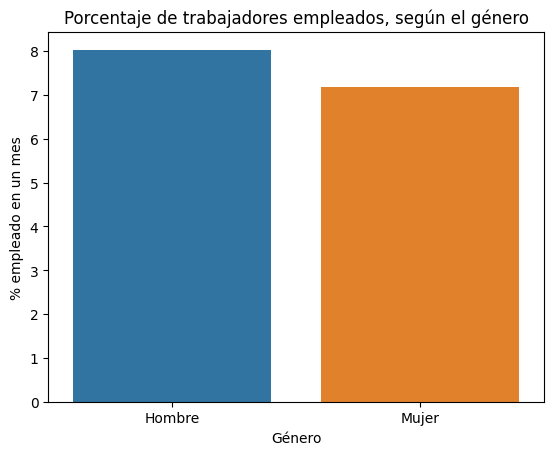

In [8]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('sexo')['empleado'].mean().reset_index()

# Sort the mean values DataFrame in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='sexo', y='empleado', data=mean_values)
plt.xlabel('Género')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según el género')

plt.show()

## Probabilidad de encontrar empleo según la edad

La probabilidad de encontrar empleo al mes siguiente varía según la edad (ver la figura generada en esta sección), como se muestra a continuación:
- El grupo de edad más probable para encontrar empleo es el de 25-29 años.
- Le sigue el grupo de 30-45 años, seguido de cerca por el grupo de +45 años. Estos dos grupos tienen una probabilidad de empleo muy similar, que también se asemeja a la del grupo de 25-29 años.
- Sin embargo, el grupo de edad de 16-24 años muestra una probabilidad significativamente más baja en comparación con los otros grupos mencionados.

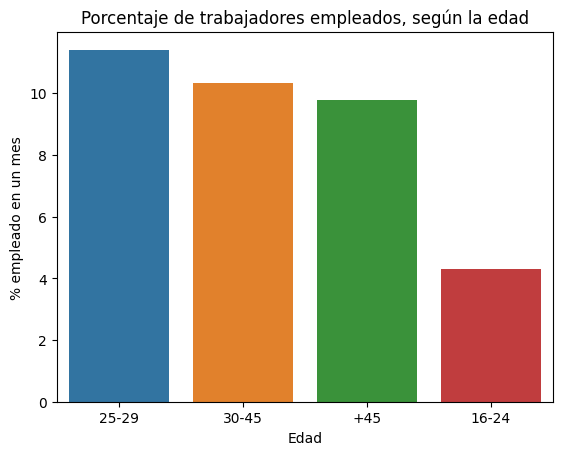

In [9]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('edad_cat')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='edad_cat', y='empleado', data=mean_values)
plt.xlabel('Edad')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según la edad')

plt.show()

## Probabilidad de encontrar empleo según la experiencia acumulada

Si comparamos la empleabilidad por nivel de experiencia acumulada (ver la figura generada en esta sección), observamos a mayor experiencia, mayores posibilidades de encontrar empleo al mes siguiente.

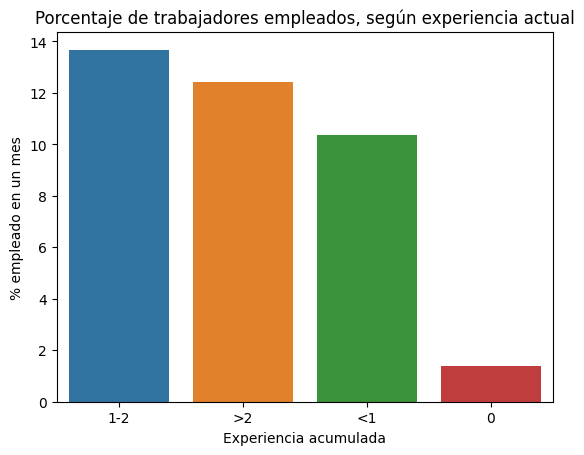

In [10]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('expe')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='expe', y='empleado', data=mean_values)
plt.xlabel('Experiencia acumulada')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según experiencia actual')

plt.show()

## Probabilidad de encontrar empleo según tiempo en el paro

Si comparamos la empleabilidad por tiempo en el paro (ver la figura generada en esta sección), observamos que a  menor tiempo en el paro, mayores posibilidades de encontrar empleo al mes siguiente.

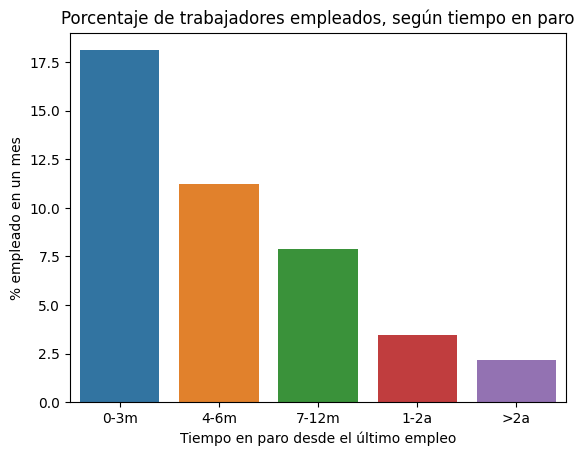

In [11]:
# Calculate mean of column Y by categories in column X
mean_values = df_desc.groupby('paro')['empleado'].mean().reset_index()

# Sort the mean values dataframe in descending order
mean_values = mean_values.sort_values(by='empleado', ascending=False)

# Create bar graph
sns.barplot(x='paro', y='empleado', data=mean_values)
plt.xlabel('Tiempo en paro desde el último empleo')
plt.ylabel('% empleado en un mes')
plt.title('Porcentaje de trabajadores empleados, según tiempo en paro')

plt.show()

## Probabilidad de estar empleado al mes siguiente

Los datos iniciales muestran que existe una clara estacionalidad en la probabilidad de encontrar un empleo al mes siguiente, al igual que una clara tendencia creciente desde el periodo de la recuperación económica (ver la figura generada en esta sección). Esto es un factor clave a tomar en cuenta para el entrenamiento del modelo, ya que según el mes en que el trabajador busque activamente un empleo, sus probabilidades pueden variar.

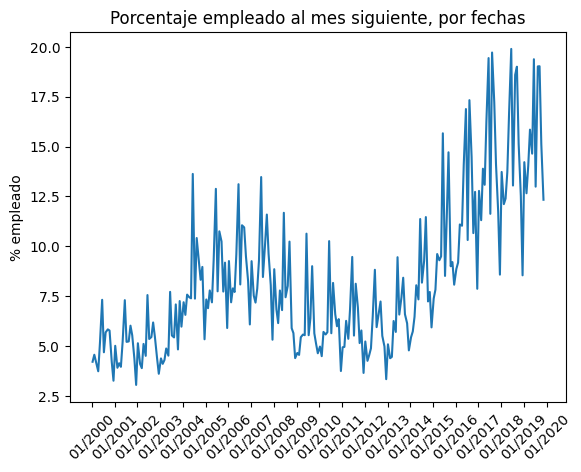

In [12]:
# Calculate average Y by month and year
avg_values = df_desc.groupby(df_desc['fecha'])['empleado'].mean().reset_index()

# Create line plot using seaborn
sns.lineplot(x='fecha', y='empleado', data=avg_values)

# Get the current axes
ax = plt.gca()

# Set the x-axis formatter to display only January for each year
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

# Rotate the tick labels for better readability
plt.xticks(rotation=45)
plt.xlabel('')
plt.ylabel('% empleado')
plt.title('Porcentaje empleado al mes siguiente, por fechas')
plt.xticks(rotation=45)
plt.show()